PCR Model -Temel Bileşen Regresyonu 

In [5]:
import pandas as pd
hit = pd.read_csv("/Users/mehmetsenel/Desktop/Makine-Ogrenmesi/Hitters.csv")

In [6]:
hit.head()
df = hit.copy()
df = df.dropna()
df.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [9]:
##onehot -dummy kontrolu yapılır
dms = pd.get_dummies(df[['League','Division','NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,False,True,False,True,False,True
2,True,False,False,True,True,False
3,False,True,True,False,False,True
4,False,True,True,False,False,True
5,True,False,False,True,True,False


In [10]:
y = df["Salary"]

In [11]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64")

In [12]:
X_.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [13]:
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,True,True,True
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,False,True,False
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,True,False,True
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,True,False,True
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,False,True,False


In [14]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()

print("training",training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()

In [16]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [17]:
X_reduced_train[0:1,:]

array([[-2.49569913e+00,  3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
         6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
         3.60473661e-03, -3.41246327e-02, -4.32799605e-02,
         1.02996923e-01, -3.70733348e-03, -1.37933445e-03,
         6.63814471e-03]])

In [18]:
import numpy as np

In [19]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)[0:10]

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28])

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train,y_train)


In [21]:
pcr_model.intercept_

543.4834416243655

In [22]:
pcr_model.coef_

array([ 111.13977427,   29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,  -40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
        -18.93930958, -115.60940171,  -24.00382778,  415.70806202,
        449.51779543, -563.07375399, -302.53718462])

In [23]:
##Tahmin


In [24]:
y_pred = pcr_model.predict(X_reduced_train)

In [25]:
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [26]:
import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train,y_pred))

289.32928255649756

In [27]:
df["Salary"].mean()

535.9258821292775

In [28]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred)

0.577007525041018

In [29]:
pca2 = PCA()

In [30]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [31]:
y_pred = pcr_model.predict(X_reduced_test)

In [32]:
np.sqrt(mean_squared_error(y_test,y_pred))

400.2799477144965

  Model Tuning

In [33]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:1],y_train)
y_pred = pcr_model.predict(X_reduced_test[ : , 0:1])
print(np.sqrt(mean_squared_error(y_test,y_pred)))

392.3893558949346


In [34]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10],y_train)
y_pred = pcr_model.predict(X_reduced_test[ : , 0:10])
print(np.sqrt(mean_squared_error(y_test,y_pred)))
##bileşen sayısını değiştirdiğimizde

409.80079651476245


In [35]:
from sklearn import model_selection

In [36]:
cv_10 = model_selection.KFold(n_splits=10,shuffle=True,random_state=1)

In [37]:
lm = LinearRegression()

In [38]:
RMSE = []

In [39]:
for i in np.arange(1,X_reduced_train.shape[1] + 1) :
    score = np.sqrt(-1*model_selection.cross_val_score(lm,
                                                       X_reduced_train[:,:i],
                                                       y_train.ravel(),
                                                       cv=cv_10,
                                                       scoring='neg_mean_squared_error')).mean()
    RMSE.append(score)

/var/folders/5f/h_sq9qfs1593m5tqmzlkhynm0000gn/T/ipykernel_77822/3818409508.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train.ravel(),
/var/folders/5f/h_sq9qfs1593m5tqmzlkhynm0000gn/T/ipykernel_77822/3818409508.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train.ravel(),
/var/folders/5f/h_sq9qfs1593m5tqmzlkhynm0000gn/T/ipykernel_77822/3818409508.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train.ravel(),
/var/folders/5f/h_sq9qfs1593m5tqmzlkhynm0000gn/T/ipykernel_77822/3818409508.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy

Text(0.5, 1.0, 'Maaş Tahmin Modeli İçin PCR Model Tuning')

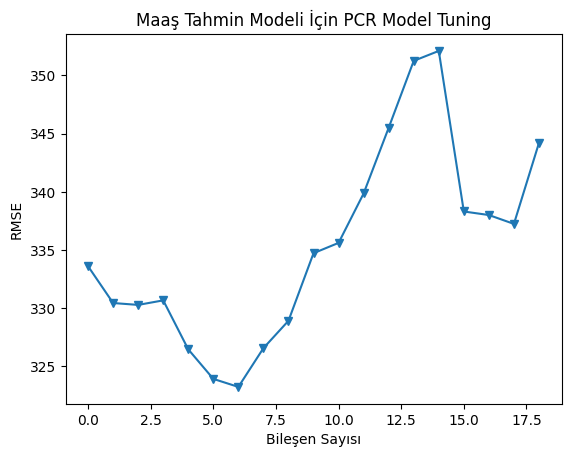

In [40]:
import matplotlib.pyplot as plt
plt.plot(RMSE,'-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning')

In [41]:
lm = LinearRegression()

In [42]:
pcr_model = lm.fit(X_reduced_train[:,0:6],y_train)

In [43]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [44]:
print(np.sqrt(mean_squared_error(y_train,y_pred)))

308.82659830945005


In [45]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [46]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

407.20007134038366


In [47]:
# PLS - Kısmi en küçük kareler regresyonu
""""
    değişkenlerin daha az sayıda ve aralarında çoklu doğ. bağlantı problemi olmayan bileşenlere indirgenip regresyon modeli
      kurulması fikrine dayanır
      * çok boyutlu laneti p > n
      
"""

'"\n    değişkenlerin daha az sayıda ve aralarında çoklu doğ. bağlantı problemi olmayan bileşenlere indirgenip regresyon modeli\n      kurulması fikrine dayanır\n      * çok boyutlu laneti p > n\n      \n'

- PCR da doğrusal kombinasyonlar yani bileşenler bağımsız değişken uzayındaki değişkenliği maksimum şekilde oluşturur
- PLS 'te ise bileşenler bağımlı değişken ile olan kovaryansını maksimum şekilde özetleyecek şekilde oluşturur.
- Değişkenler atılmak istenmiyorsa  ve açıklanabilirlik aranıyorsa "PLS"
- PLS : gözetimli boyut indirgeme , PCR : gözetimsiz boyut indirgeme
- Optimum bileşen sayısını belirlemek için CV yöntemi kullanılır

- PLS
- Model

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
hit = pd.read_csv("/Users/mehmetsenel/Desktop/Makine-Ogrenmesi/Hitters.csv")
df = hit.copy()

# Drop missing values
df = df.dropna()

# Convert categorical variables to dummy variables
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

# Define the target and features
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Concatenate the dummy variables correctly
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [49]:
from sklearn.cross_decomposition import PLSRegression,PLSSVD

In [53]:
pls_model = PLSRegression(n_components=2).fit(X_train,y_train)

In [55]:
pls_model.coef_

array([[ 2.47335600e-01,  1.13030348e+00,  2.08295898e+00,
         1.58599864e+00,  1.20781837e+00,  1.91015780e+00,
         3.55673082e+00,  1.21724059e-02,  4.94616408e-02,
         2.58964530e-01,  9.96443520e-02,  9.25548551e-02,
         9.84366218e-02,  1.77753399e-01,  4.68377973e-02,
        -1.43965788e-01,  3.51398888e+01, -7.43195797e+01,
         2.93829559e+01]])

In [56]:
#PLS tahmin

In [59]:
pls_model

PLSRegression()

In [61]:
pls_model.predict(X_train)[0:10]

array([344.91941493, 848.87070769, 692.93622642, 185.56577984,
       435.49196077, 987.49530026, 120.63097106, 289.9263406 ,
       663.41886918, 817.90486641])

In [62]:
y_pred =  pls_model.predict(X_train)

In [63]:
np.sqrt(mean_squared_error(y_train,y_pred))

310.1167593109696

In [64]:
r2_score(y_train,y_pred)

0.5140424486535481

Model Tuning

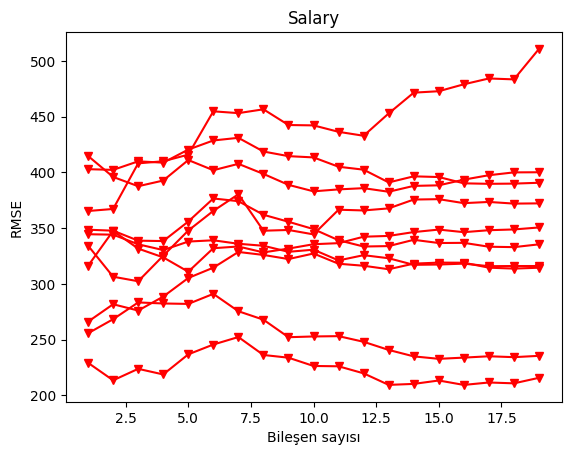

In [67]:
#CV 
cv_10 = model_selection.KFold(n_splits=10,shuffle=True,random_state=1)

#hata hesaplamak için döngü
RMSE = []

for i in np.arange(1,X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls,X_train,y_train,cv=cv_10,scoring='neg_mean_squared_error'))
    RMSE.append(score)

#Sonuçların görselleştirilmesi
plt.plot(np.arange(1,X_train.shape[1] + 1),np.array(RMSE),'-v',c = "r")
plt.xlabel('Bileşen sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [68]:
pls_model = PLSRegression(n_components=2).fit(X_train,y_train)

In [69]:
y_pred = pls_model.predict(X_test)

In [70]:
np.sqrt(mean_squared_error(y_test,y_pred))

398.09956327448526

RİDGE REGRESYON
- amaç hata kareler toplamını minimize eden bu katsayılara bir ceza uygulayarak bulmaktır.

- Aşırı öğrenmeye karşı dirençlidir.
- yanlıdır fakat varyansı düşüktür.
- çok fazla parametre olduğunda EKK'ya göre daha iyidir.
- Çok boyutluluk lanetine karşı çözüm sunar.
- lambda kritik roldedir.iki terimin göreceli etkilerini kontrol etmeyi sağlar.
- lambda için iyi bir değer bulunması önemlidir.Bunun için CVV yöntemi kullanılır.

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
hit = pd.read_csv("/Users/mehmetsenel/Desktop/Makine-Ogrenmesi/Hitters.csv")
df = hit.copy()

# Drop missing values
df = df.dropna()

# Convert categorical variables to dummy variables
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

# Define the target and features
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Concatenate the dummy variables correctly
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [72]:
from sklearn.linear_model import Ridge

In [73]:
ridge_model = Ridge(alpha=0.1).fit(X_train,y_train)

In [76]:
ridge_model

Ridge(alpha=0.1)

In [77]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

Text(0, 0.5, 'Katsayılar/Ağırlıklar')

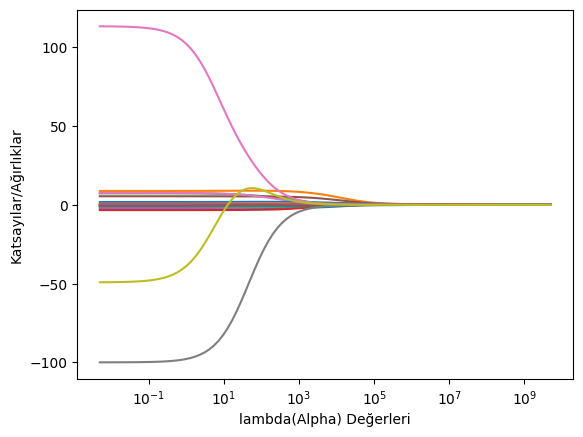

In [78]:
lambdalar = 10 ** np.linspace(10,-2,100)*0.5

ridge_model = Ridge()
katsayılar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train,y_train)
    katsayılar.append(ridge_model.coef_)

ax = plt.gca()
ax.plot(lambdalar,katsayılar)
ax.set_xscale('log')

plt.xlabel('lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')


In [79]:
#TAHMİN

In [80]:
y_pred = ridge_model.predict(X_test)

In [81]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.0517922282834

In [82]:
#Model Tuning
lambdalar = 10 ** np.linspace(10,-2,100)*0.5
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [84]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Create a pipeline with scaling and RidgeCV
ridge_cv = make_pipeline(StandardScaler(), RidgeCV(alphas=lambdalar, scoring="neg_mean_squared_error"))

# Now fit ridge_cv to your data
ridge_cv.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
                         scoring='neg_mean_squared_error'))])

In [91]:
best_alpha = ridge_cv.named_steps['ridgecv'].alpha_
print("Best alpha:", best_alpha)

Best alpha: 152.69277544167062


In [96]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Standardize the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use the best alpha from RidgeCV
best_alpha = ridge_cv.named_steps['ridgecv'].alpha_

# Fit the Ridge model with the selected alpha on scaled data
ridge_tuned = Ridge(alpha=best_alpha).fit(X_train_scaled, y_train)

# Now you can evaluate or use ridge_tuned as needed
print("Ridge model coefficients:", ridge_tuned.coef_)


Ridge model coefficients: [ 20.72957197  44.83776456  12.18846066  29.59967693  19.85711467
  32.40356814  17.83230699  27.8184082   35.00186823  21.64981082
  36.17482452  31.45346479  22.72180453  49.87257301   4.4461362
  -6.26862797  14.34898909 -33.56508324   6.38167502]


In [97]:
np.sqrt(mean_squared_error(y_test,ridge_tuned.predict(X_test)))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


197428.54519565022

LASSO REGRESYON
- AMAÇ HATA KARELER TOPLAMINI MİNİMİZE EDEN KATSAYILARI BU KATSAYILARA BİR CEZA UYGULAYARAK BULMAKTIR.



- ilgili - ilgisiz tüm değişkenleri modelde bırakma dezavantajını gidermek için önerilir.
- lassoda katsayılar sıfıra yaklaşır
- fakat L1 normu lambda yeteri kadar büyük olduğunda bazı katsayıları sıfır yapar
- lambdanın doğru seçilmesi çok önemlidir.
- lambdanın sıfır olduğu yer EKK dır


In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
hit = pd.read_csv("/Users/mehmetsenel/Desktop/Makine-Ogrenmesi/Hitters.csv")
df = hit.copy()

# Drop missing values
df = df.dropna()

# Convert categorical variables to dummy variables
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

# Define the target and features
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Concatenate the dummy variables correctly
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [99]:
from sklearn.linear_model import Lasso

In [100]:
lasso_model = Lasso(alpha=0.1).fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.249e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [101]:
lasso_model

Lasso(alpha=0.1)

In [102]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.231e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.248e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

Text(0, 0.5, 'weights')

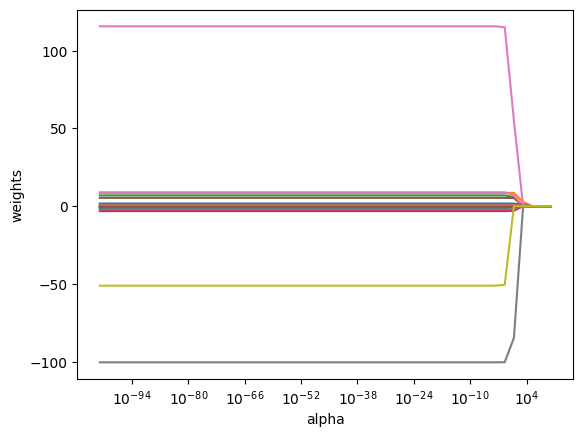

In [103]:
lasso = Lasso()
lambdalar = 10 **np.linspace(10,-2-100)*0.5
katsayılar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train,y_train)
    katsayılar.append(lasso.coef_)

ax = plt.gca()
ax.plot(lambdalar*2,katsayılar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [104]:
#tahmin
lasso_model.predict(X_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [105]:
y_pred = lasso_model.predict(X_test)

In [106]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.75452701487706

Model Tuning


In [107]:
from sklearn.linear_model import LassoCV

In [121]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import normalize

# Perform L2 normalization (normalize each feature vector to have unit norm)
X_train_normalized = normalize(X_train, axis=0)
X_test_normalized = normalize(X_test, axis=0)

# Define the LassoCV model (without normalize=True)
lasso_cv_model = LassoCV(alphas=None, cv=10, max_iter=10000)

# Fit the model on the L2-normalized training data
lasso_cv_model.fit(X_train_normalized, y_train)

# Retrieve and print the best alpha selected
best_alpha = lasso_cv_model.alpha_
print("Best alpha for LassoCV:", best_alpha)


Best alpha for LassoCV: 0.3893050983725915


In [123]:
lasso_tuned = Lasso(alpha= lasso_cv_model.alpha_)

In [124]:
lasso_tuned.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.253e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.3893050983725915)

In [125]:
y_pred = lasso_tuned.predict(X_test)

In [126]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.52625593419543